In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm
!python -m spacy download en
import nltk
nltk.download('all')

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=a283fbc0ab0db3b352b10e2aef4889ca6f588433c5088ced0223909af3b21b53
  Stored in directory: /tmp/pip-ephem-wheel-cache-6sqielb1/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
     |████████████████████████████████| 12.0 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 12.0 MB 5.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
[nltk_data] Downlo

False

In [1]:
from sklearn.decomposition import PCA

import sklearn
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer


from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
import pandas as pd
import spacy
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import itertools
import collections
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

nlp = spacy.load('en_core_web_lg')
import re
from ast import literal_eval

In [2]:
import pandas as pd

df=pd.read_csv("/content/drive/MyDrive/NLP_attempt2/imdb_scraped.csv")

In [3]:
df.head()

,title,description,rating,popularity
0,Uncle Tom's Cabin,Geo. Shelby is forced to sell his faithful old...,5.4,NaN
1,The Undesirable,"Betty (Lili Berky, Duel For Nothing), a young ...",6.2,NaN
2,Cinderella,Based on the fairy tale: Cinderella is mistrea...,6.0,NaN
3,The Regeneration,"At 10 years old, Owens becomes a ragged orphan...",6.9,NaN
4,The Golem,"In this version of the golem legend, the golem...",6.8,NaN


In [4]:
df.drop(['popularity'],axis=1,inplace=True)

In [5]:
import itertools
import collections
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


#import contractions list and remove it in the next step
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"thx"   : "thanks"
}

def remove_contractions(text):
    return contractions[text.lower()] if text.lower() in contractions.keys() else text

# clean dataset
def clean_dataset(text):
    # To lowercase
    text = text.lower()
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove tickers
    text = re.sub(r'\$\w*', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    # Remove whitespace (including new line characters)
    text = re.sub(r'\s\s+','', text)
    text = re.sub(r'[ ]{2, }',' ',text)
    # Remove URL, RT, mention(@)
    text=  re.sub(r'http(\S)+', '',text)
    text=  re.sub(r'http ...', '',text)
    text=  re.sub(r'(RT|rt)[ ]*@[ ]*[\S]+','',text)
    text=  re.sub(r'RT[ ]?@','',text)
    text = re.sub(r'@[\S]+','',text)
    # Remove words with 2 or fewer letters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    #&, < and >
    text = re.sub(r'&amp;?', 'and',text)
    text = re.sub(r'&lt;','<',text)
    text = re.sub(r'&gt;','>',text)
    # Insert space between words and punctuation marks
    text = re.sub(r'([\w\d]+)([^\w\d ]+)', '\1 \2',text)
    text = re.sub(r'([^\w\d ]+)([\w\d]+)', '\1 \2',text)
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove misspelling words
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    # Remove punctuation
    text = ' '.join(re.sub("[\.\,\!\?\:\;\-\=\/\|\'\(\']", " ", text).split())
    # Remove emoji
    #text = emoji.demojize(text)
    text = text.replace(":"," ")
    text = ' '.join(text.split()) 
    text = re.sub("([^\x00-\x7F])+"," ",text)
    # Remove Mojibake (also extra spaces)
    text = ' '.join(re.sub("[^\u4e00-\u9fa5\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    return text

#remove stop word i.e. the most frequently appeared words 
# I ended up with building my own stop word lists because NLTP simply removed all negation words which totally changed the meaning of the sentence. 
myOwnStopList=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'what','how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'do', 'should', "should", 'now', 'd', 'm', 'o', 're', 've', 'y', 'ain', "are", 'could', "was",
'would','have','get','got','getting','one','two','still','going']



In [6]:
df['description']=df['description'].apply(lambda x: remove_contractions(str(x)))

df['description'] =df['description'].apply(lambda x: clean_dataset(x))
df['description'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (myOwnStopList)]))


In [7]:
df.head()

,title,description,rating
0,Uncle Tom's Cabin,shelby forced sell faithful old infant son eli...,5.4
1,The Undesirable,betty duel young woman living told dying fathe...,6.2
2,Cinderella,based fairy cinderella mistreated stepmother f...,6.0
3,The Regeneration,years owens becomes ragged orphan sainted moth...,6.9
4,The Golem,version golem clay statue brought life rabbi l...,6.8


In [9]:
x=df['description']

df['rating']=df['rating'].apply(lambda x: 1 if x>6.5 else 0)

y=df['rating']

Wordclouds of words involved in successful and unsuccessful movies

In [24]:
successful_data=df[df['rating']==1]
failure_data=df[df['rating']==0]

total_success_plots = ' '.join(successful_data['description'].str.lower())
total_failure_plots=' '.join(failure_data['description'].str.lower())


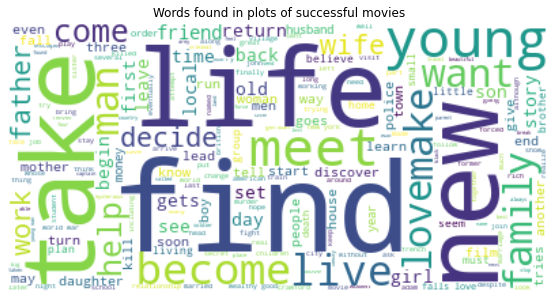

In [25]:
# Create and generate a word cloud image:
from wordcloud import WordCloud,STOPWORDS
stopwords=STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(total_success_plots)

# Display the generated image:
plt.rcParams["figure.figsize"] = (20,5)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Words found in plots of successful movies")
plt.show()


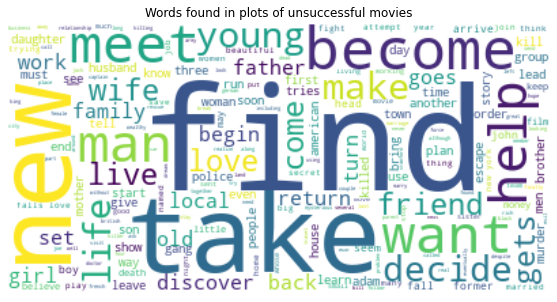

In [26]:
# Create and generate a word cloud image:
from wordcloud import WordCloud,STOPWORDS
stopwords=STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(total_failure_plots)

# Display the generated image:
plt.rcParams["figure.figsize"] = (20,5)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Words found in plots of unsuccessful movies")
plt.show()

### Train Test split

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

### Feature transformation

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=50000,stop_words='english')


In [31]:
xtrain = vect.fit_transform(xtrain)
xtest=vect.transform(xtest)

In [32]:
print(xtrain.shape)
print(xtest.shape)

(24000, 49323)
(6000, 49323)


Ensemble model

In [33]:
from sklearn.ensemble import RandomForestClassifier

model3=RandomForestClassifier()

model3.fit(xtrain,ytrain)
labels=['Unsuccessful','Successful']
ypred3=model3.predict(xtest)

print(classification_report(ytest,ypred3,target_names=labels))

              precision    recall  f1-score   support

Unsuccessful       0.65      0.94      0.77      3681
  Successful       0.65      0.18      0.28      2319

    accuracy                           0.65      6000
   macro avg       0.65      0.56      0.52      6000
weighted avg       0.65      0.65      0.58      6000



Although recall of unsucessful data is high, the model seems much biased towards one class of data with successful class recall being 0.17